In [186]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt


In [308]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = x * x 

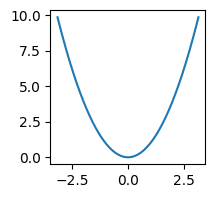

In [309]:
plt.figure(figsize=(2,2))
plt.plot(x, y)

In [490]:
n_neurons = 4

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Linear(1, n_neurons), nn.ReLU(),
                        nn.Linear(n_neurons, 1))
        
        self.layer2 = torch.nn.Flatten(0, 1)
        
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        
        return x

model = NeuralNetwork()

In [491]:
model

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=1, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=1, bias=True)
  )
  (layer2): Flatten(start_dim=0, end_dim=1)
)

In [492]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

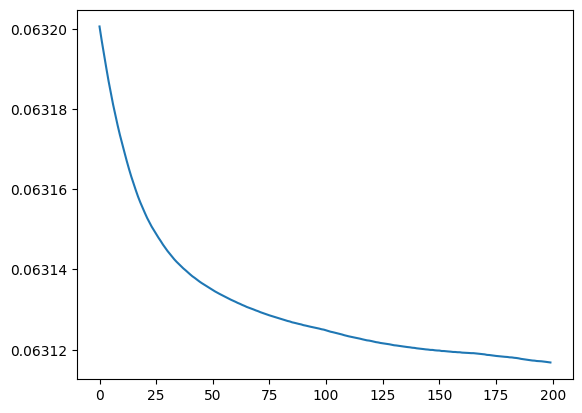

In [497]:
num_epochs = 200
error = []
for i in range(num_epochs):
    # Forward pass
    outputs = model(x.unsqueeze(1))
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    error.append(loss.item())
    
plt.plot(error)

In [498]:
print(error[-1])

0.06311681121587753


In [499]:
with torch.no_grad():
    predicted = model(x.unsqueeze(1))

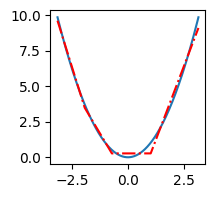

In [500]:
plt.figure(figsize=(2,2))
plt.plot(x, y)
plt.plot(x, predicted, 'r-.')